 #                                  Supervised Learning Project

# Problem statement:

(Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

Exploratory Data Analysis to predict the Bank customers who have the highest likelihood of Buying the Personal Loan

In [149]:
#import Pandas,Numpy,Seaborn,Matplotlib for Exploratory Data Analysis,Data visualization
#import scikit learn for Model Building ,evaluate accuracy score ,draw confusion Matrix and retrieve Classification report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score 
from sklearn import model_selection
import os

In [192]:
# Import the dataset 'bank_personal_loan_modelling'.csv'
loan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# 1. Read the column description and ensure you understand each attribute well

In [189]:
# Display the first 5 rows of the dataset
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1.0,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,1,0


In [191]:
#To check the dimension or shape of the dataset
loan.shape

(5000, 14)

This dataset contains 5000 obervations and 14 attributes

In [8]:
#Reshaping the Target column = Personal Loan
#Drop and re-locate Personal Loan at the end column in DataFrame
# Createa copy of Dataframe for Data manipulation
loan_bank = loan
target= loan_bank['Personal Loan']
loan_bank.drop(['Personal Loan'], axis = 1,inplace = True)
loan_bank['Personal Loan'] = target
loan_bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


Personal Loan which been moved to the end for easy prediction of Target Column

In [9]:
# To view the data type and number of values entered in each of the Independent attributes and Dependent attribute
loan_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All the columns/attributes have 5000 non-null values.

In [10]:
# Detect all the missing values in the Dataframe
loan_bank.isna().apply(pd.value_counts)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


No null values present in the entire dataset

In [11]:
# display Number of Null values in each of the attribute
loan_bank.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
Personal Loan         False
dtype: bool

No Null values present in each of the Attribute

In [12]:
#describe() show the summary of statistics about all numeric attributes.
loan_bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


Bank Customers are mostly around the average age of 45
Customers Holding maximum Average spending on credit cards per month of $10 

In [13]:
#Detect the presence of Negative values in Experience
loan_bank[loan_bank['Experience'] < 0]['Experience'].count()

52

In [14]:
#Replace Negative values with Median in Experience column
exp =loan_bank.loc[:,"Experience"].median()
loan_bank.loc[:, 'Experience'].replace([-1, -2, -3], [exp,exp,exp], inplace=True)

In [15]:
#After Replacement ,No negative values present in Experience
loan_bank[loan_bank['Experience'] < 0]['Experience'].count()

0

In [193]:
#Generate descriptive statistics that summarize the central tendency, dispersion and shape of distribution.
loan_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


# 2.Study the data distribution in each attribute, share your findings

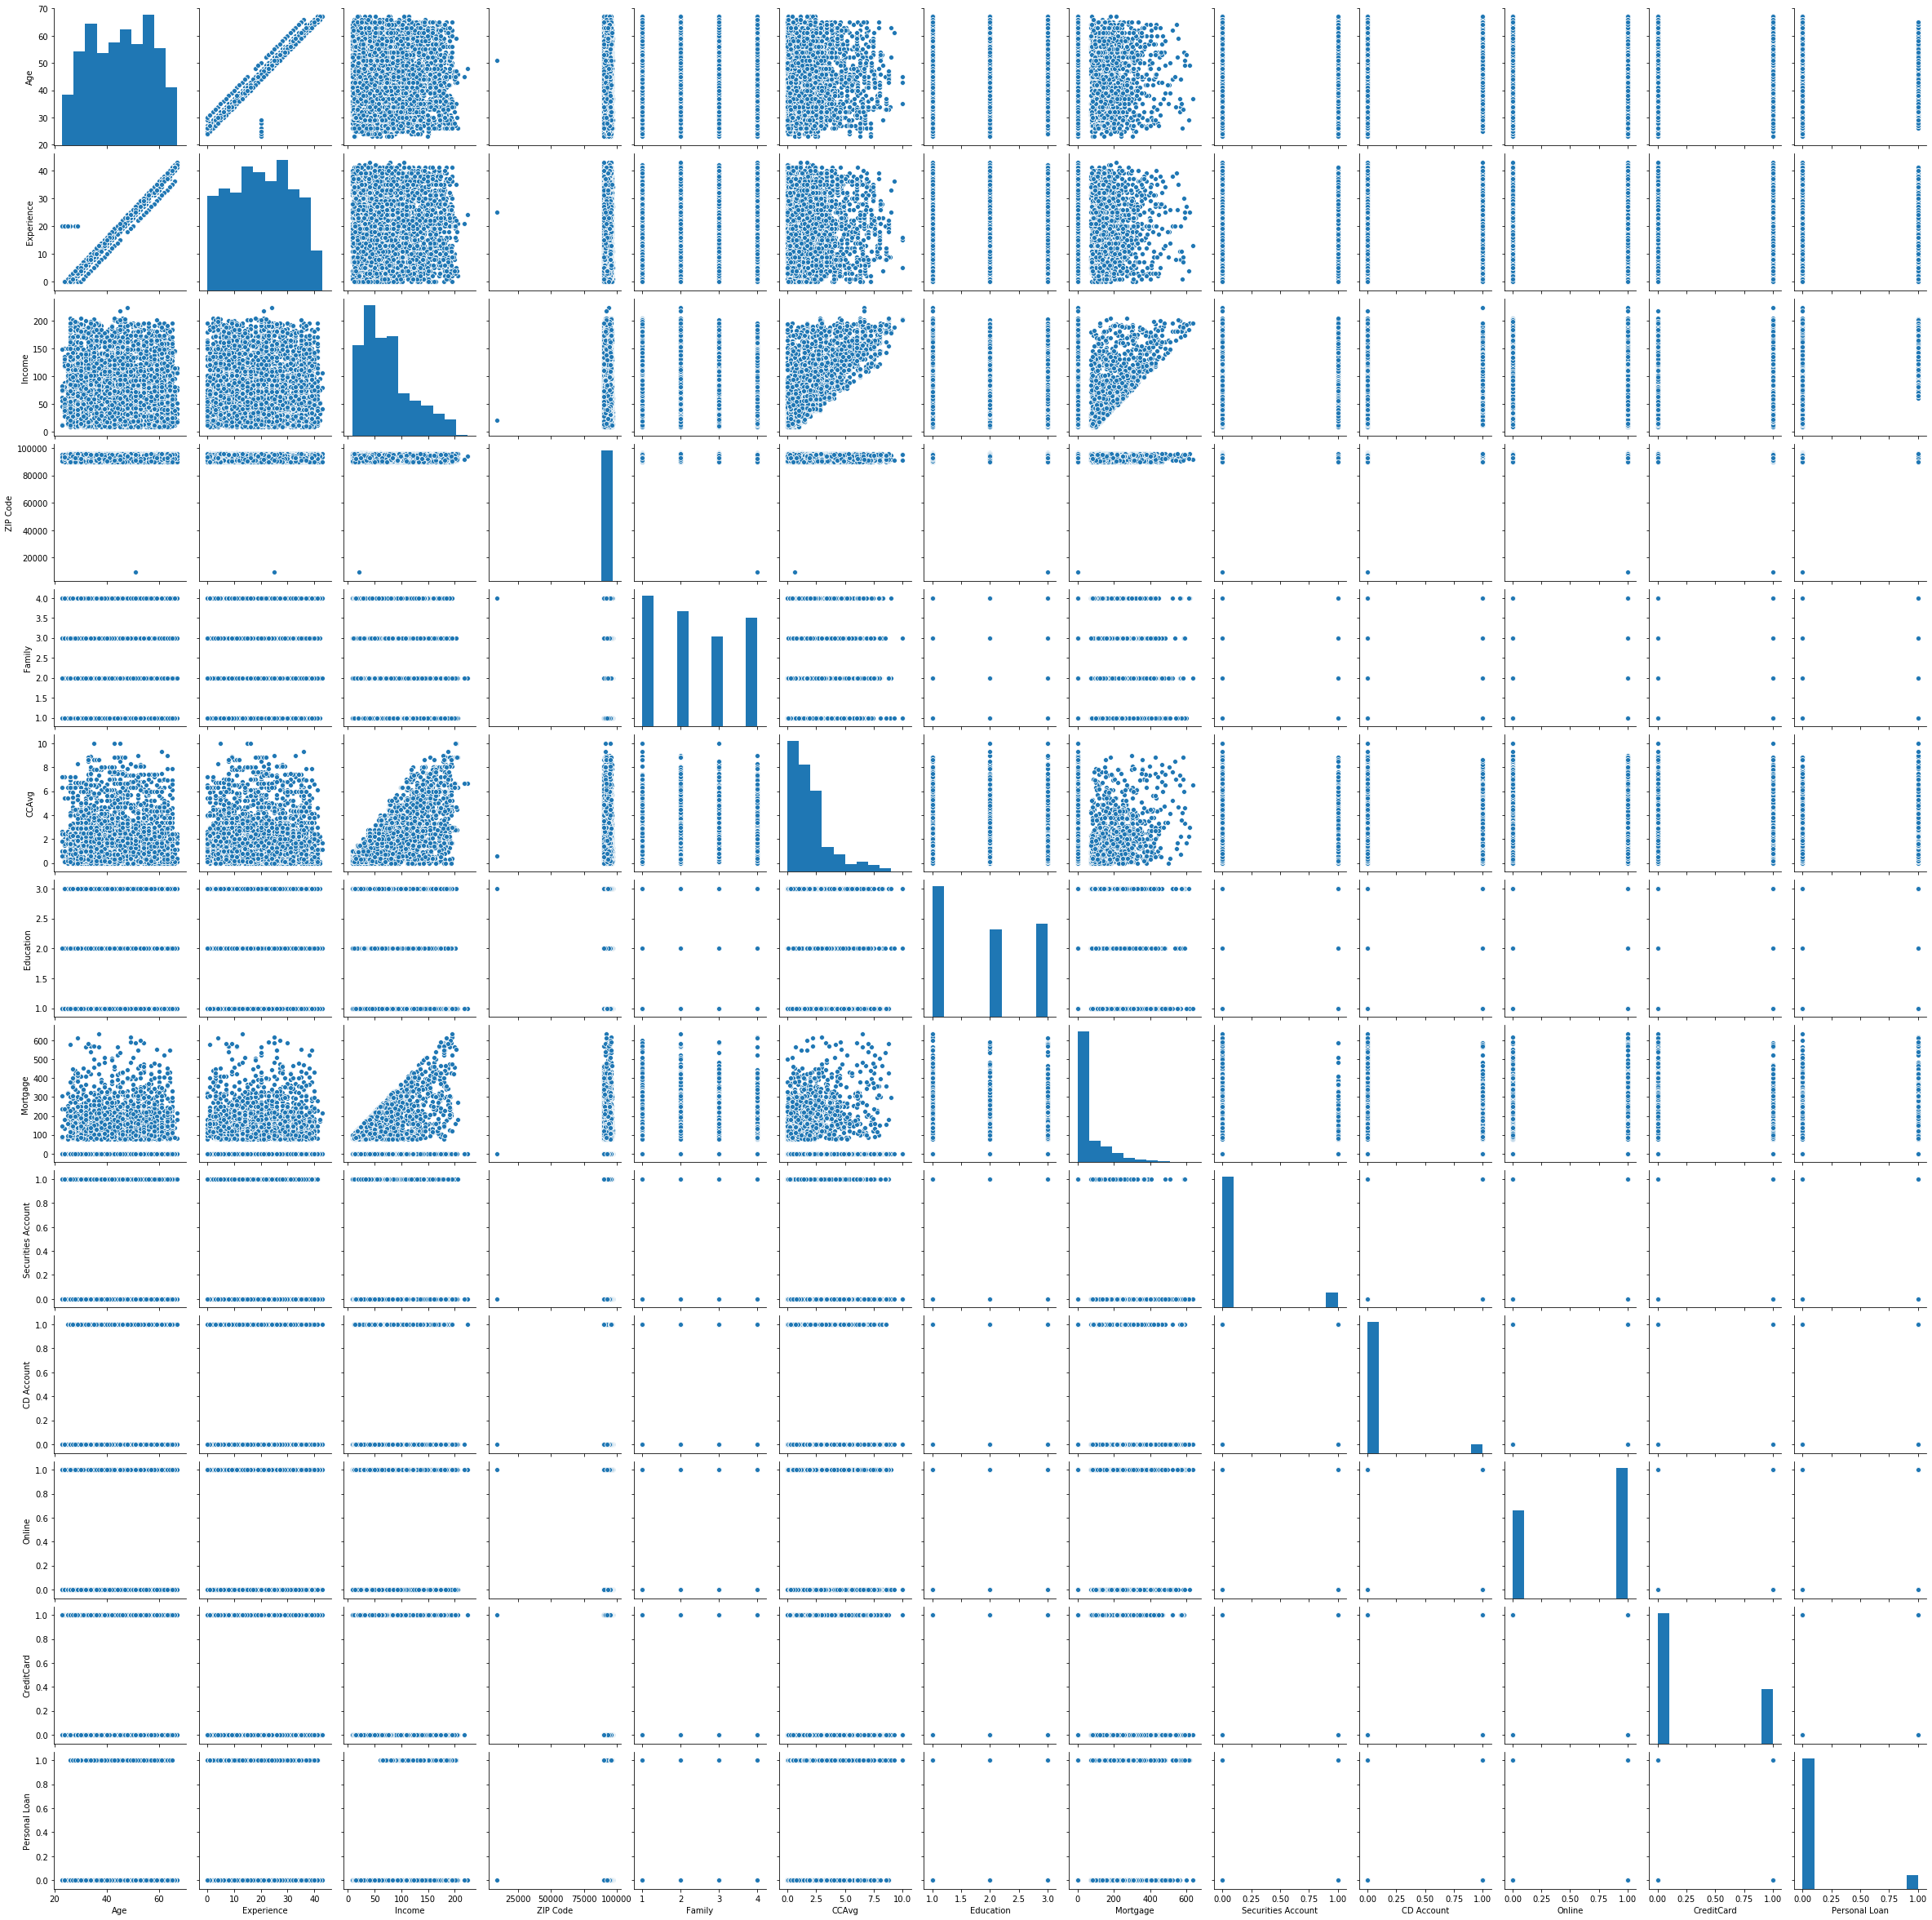

In [17]:
Pair plot which shows the bivaraiate distribution using scatter plot and univaraite distribution using Histograms.
sns.pairplot(loan_bank.iloc[:,1:]);

In [18]:
#Determine the measure of the Skewness distribution of Numerical Attributes
import statsmodels.api as sm
import scipy.stats as stats
skewness = pd.DataFrame({'skewness' : [stats.skew(loan_bank.Age),stats.skew(loan_bank.Experience),stats.skew(loan_bank.Income),stats.skew(loan_bank.CCAvg)
                                      ,stats.skew(loan_bank.Mortgage)]},index=['Age','Experience','Income','CCAvg','Mortgage'])
skewness

,skewness
Age,-0.029332
Experience,-0.014096
Income,0.841086
CCAvg,1.597964
Mortgage,2.103371


Age and Experience are Symmetrically distributed

Income, CCAvg and Mortgage are highly right skewed which shows a lot of extreme values

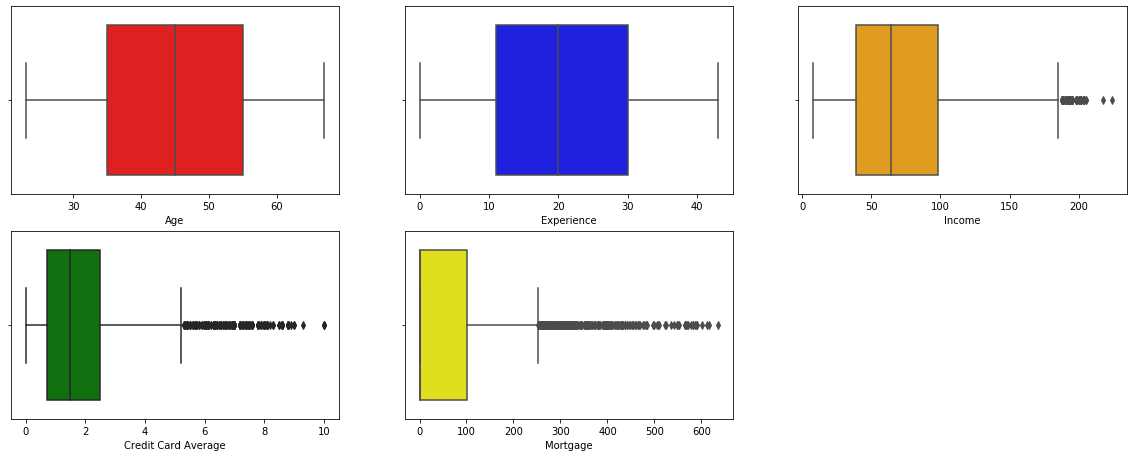

In [24]:
##Univariate Distribution of all Numerical Attributes

plt.figure(figsize= (20,20))
plt.subplot(5,3,1)
sns.boxplot(x = loan_bank.Age, color='red')
plt.xlabel('Age')

plt.subplot(5,3,2)
sns.boxplot(x = loan_bank.Experience, color='blue')
plt.xlabel('Experience')

plt.subplot(5,3,3)
sns.boxplot(x = loan_bank.Income, color='orange')
plt.xlabel('Income')

plt.subplot(5,3,4)
sns.boxplot(x = loan_bank.CCAvg, color='green')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
sns.boxplot(x = loan_bank.Mortgage, color='yellow')
plt.xlabel('Mortgage')

plt.show()

Text(0.5, 1.0, 'Credit Card Distribution')

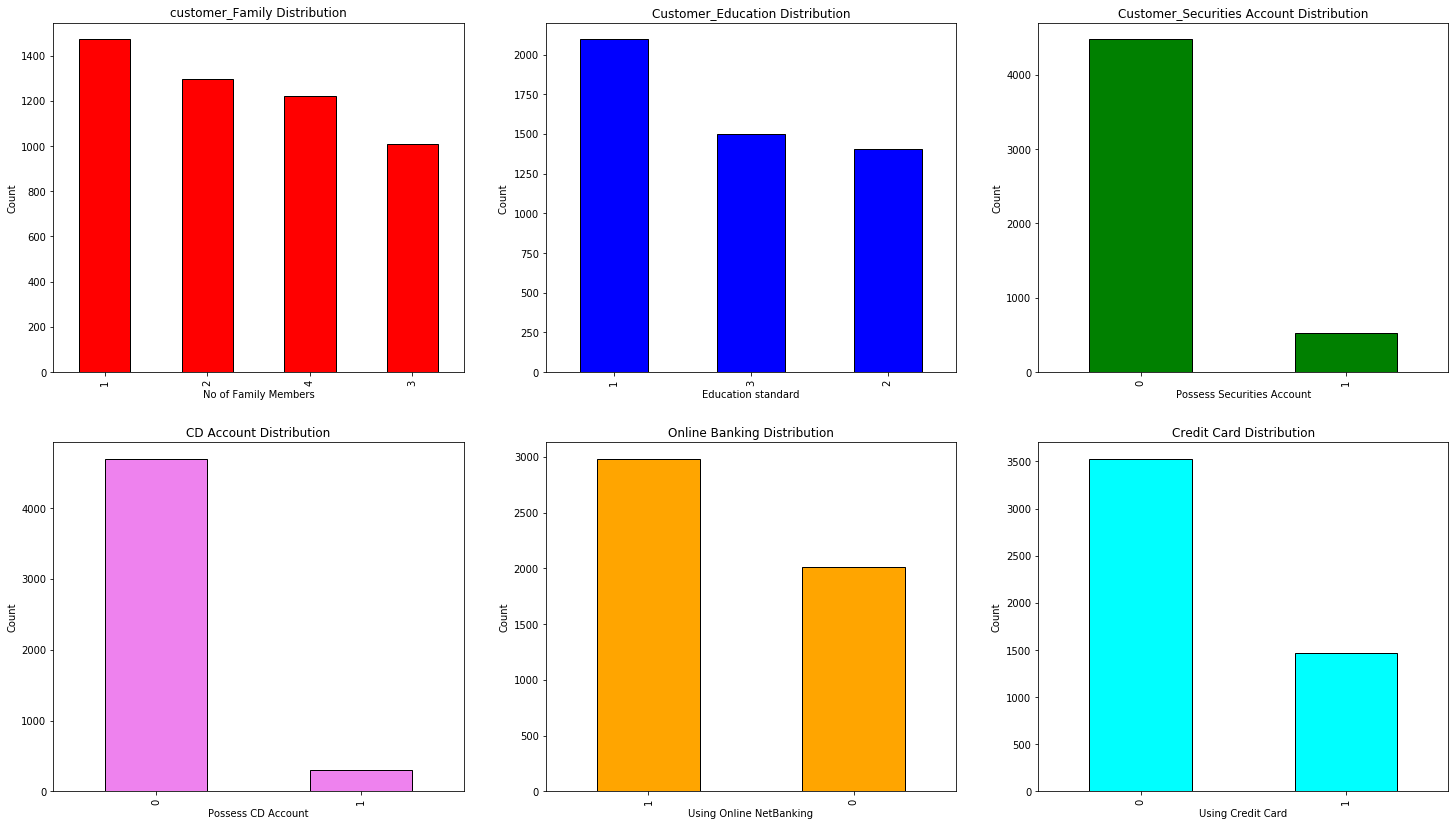

In [25]:
#Univariate Distribution of all Categorical Attributes

plt.figure(figsize=(25,45))


plt.subplot(6,3,1)
loan_bank['Family'].value_counts().plot(kind="bar", align='center',color = 'red',edgecolor = 'black')
plt.xlabel("No of Family Members")
plt.ylabel("Count")
plt.title("customer_Family Distribution")


plt.subplot(6,3,2)
loan_bank['Education'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel('Education standard')
plt.ylabel('Count ')
plt.title('Customer_Education Distribution')


plt.subplot(6,3,3)
loan_bank['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'green',edgecolor = 'black')
plt.xlabel('Possess Securities Account')
plt.ylabel('Count')
plt.title('Customer_Securities Account Distribution')


plt.subplot(6,3,4)
loan_bank['CD Account'].value_counts().plot(kind="bar", align='center',color = 'violet',edgecolor = 'black')
plt.xlabel('Possess CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")


plt.subplot(6,3,5)
loan_bank['Online'].value_counts().plot(kind="bar", align='center',color = 'orange',edgecolor = 'black')
plt.xlabel('Using Online NetBanking')
plt.ylabel('Count')
plt.title("Online Banking Distribution")


plt.subplot(6,3,6)
loan_bank['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'cyan',edgecolor = 'black')
plt.xlabel('Using Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")

<Figure size 1440x1800 with 0 Axes>

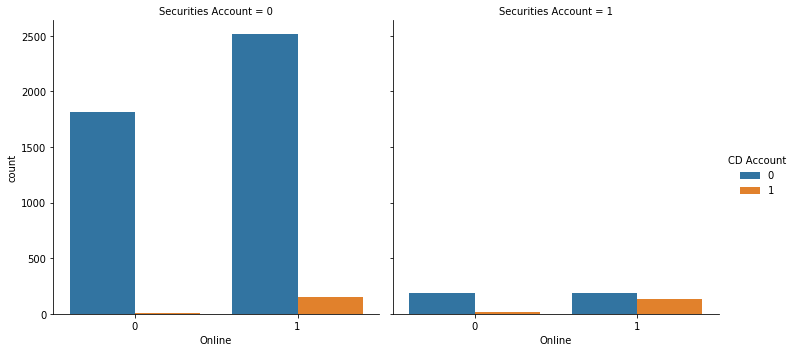

In [215]:
#Categorical plot distribution where x as online using count plot as kind
plt.figure(figsize=(20,25))
sns.catplot(x="Online", hue="CD Account",
                col="Securities Account", kind= "count",data = loan_bank);

<Figure size 1440x1800 with 0 Axes>

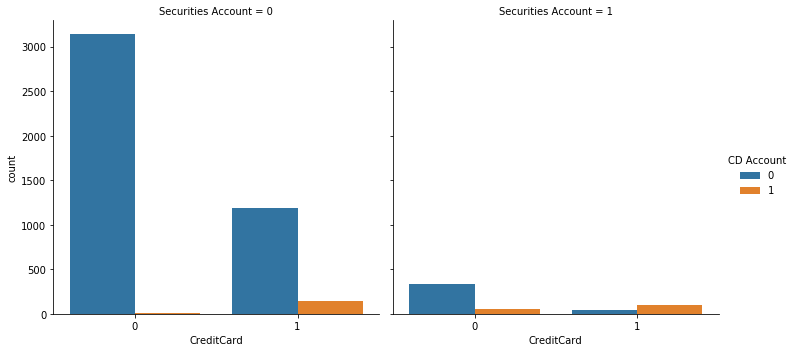

In [27]:
#Categorical plot distribution where x as Credit Card using count plot as kind
plt.figure(figsize=(20,25))
sns.catplot(x="CreditCard", hue="CD Account",
                col="Securities Account", kind= "count",data = loan_bank);

<Figure size 1440x1800 with 0 Axes>

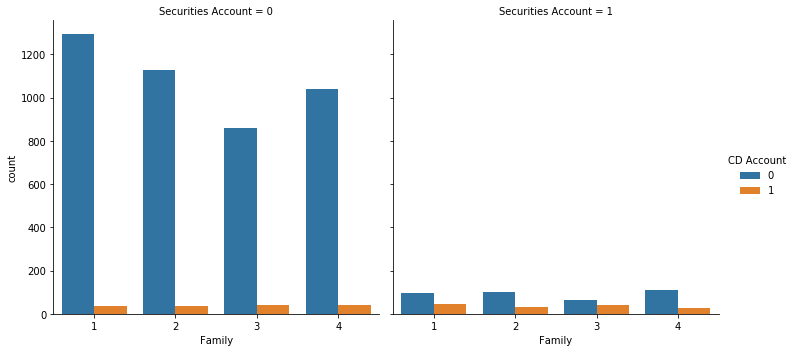

In [28]:
#Categorical plot distribution where x as family using count plot as kind
plt.figure(figsize=(20,25))
sns.catplot(x="Family", hue="CD Account",
                col="Securities Account", kind= "count",data = loan_bank);

<Figure size 1440x1800 with 0 Axes>

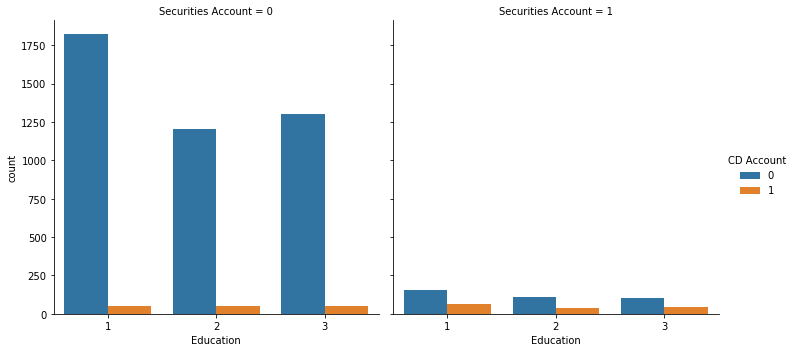

In [29]:
#Categorical plot distribution where x as Education using count plot as kind
plt.figure(figsize=(20,25))
sns.catplot(x="Education", hue="CD Account",
                col="Securities Account", kind= "count",data = loan_bank);

In [194]:
#Check Correlation of all Attributes
loan_bank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028,-0.024801
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.000465,0.005526,0.013459,0.008834,-0.014013
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZIP Code,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.024675,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.016972,-0.000436,-0.000465,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954


1)ID: data distribution is normal.

2) Age: the mean and median of the attribute is equal and has normal distrbution

3) Eductaion : Mean and median is almost equal. Data is symmetrically distributed.

4) Income :  data is highly left skewed distribution

5) ZIP Code: Spread is also very less. More amount ofdata from different places need to be collected.

6)Family: families with the least member is highest
    
7)Mortage:  highly left skewed distribution. Most customers are having least mortage.

8)Securities Account :  Mostly, cutomers are not having Security account and the maximum count is One

9)CD account: Many customers don't have CDaccounts.

10)Online: Larger number of customers use online Net-banking

11)Credit Card: Very less number of customers using Credict card

# 3. Get the target column distribution

In [ ]:
#Target column is Personal Loan
#To predict the Bank customers who have the highest likelihood of Buying the Personal Loan 
# Value 0 = Customer didnt avail Personal loan in the last campaign (90.4%)
#Value  1 = Customer availed Personal loan in the last campaign (9.6%)
loan_bank["Personal Loan"].value_counts()

In [32]:
pd.crosstab(loan_bank["Personal Loan"],columns='count')

col_0,count
Personal Loan,
0,4520
1,480


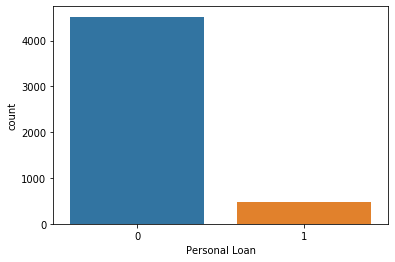

In [33]:
sns.countplot(loan_bank["Personal Loan"]);

In [34]:
#Determine the relative count and Percentage of Personal Loan subscribed  and Personal Loan not subscribed 
no_subscribe = len(loan_bank[loan_bank['Personal Loan']==0])
print('Personal Loan not subscribed count :',no_subscribe)
subscribe = len(loan_bank[loan_bank['Personal Loan']==1])
print('Personal Loan subscribed count :',subscribe)
percent_no_sub = no_subscribe/(no_subscribe+subscribe)
print("percentage of no Personal loan subscription  is", percent_no_sub*100)
percent_sub = subscribe/(no_subscribe+subscribe)
print("percentage of Personal loan subscription", percent_sub*100)

Personal Loan not subscribed count : 4520
Personal Loan subscribed count : 480
percentage of no Personal loan subscription  is 90.4
percentage of Personal loan subscription 9.6


In [35]:
#Group Dataframe by Target column with respect to the average value of Independent Attributes
loan_bank.groupby(loan_bank['Personal Loan']).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.378982,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [ ]:
#Bivariate Distribution of Target column (Personal Loan) with respect to all other Independent Numeric attributes
#Using Scatter Plot
plt.figure(figsize=(15,15))

plt.subplot(4,1,1)
sns.scatterplot(loan_bank.Age, loan_bank.Experience, hue = loan_bank['Personal Loan'], palette= ['red','blue']);

plt.subplot(4,1,2)
sns.scatterplot(loan_bank.Experience, loan_bank.Income, hue = loan_bank['Personal Loan'], palette= ['blue','green']);

plt.subplot(4,1,3)
sns.scatterplot(loan_bank.Education, loan_bank.Mortgage, hue = loan_bank['Personal Loan'], palette= ['green','yellow']);

plt.subplot(4,1,4)
sns.scatterplot(loan_bank.Education, loan_bank.Income, hue = loan_bank['Personal Loan'], palette= ['green','yellow']);

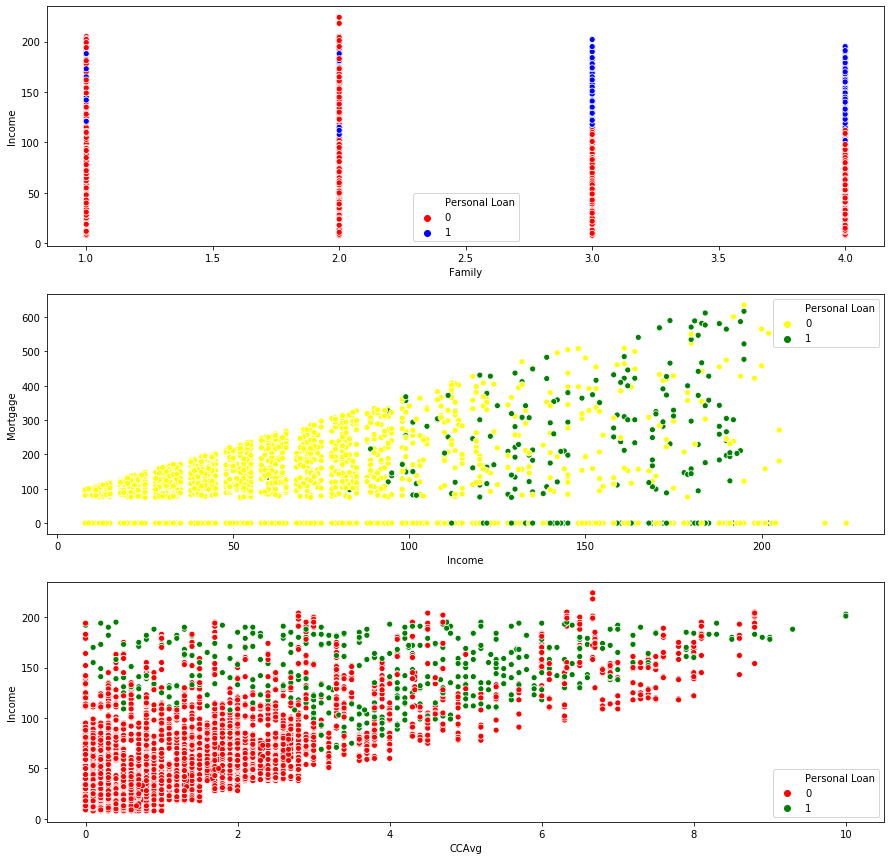

In [38]:
plt.figure(figsize=(15,15))


plt.subplot(3,1,1)
sns.scatterplot(loan_bank.Family, loan_bank.Income, hue = loan_bank['Personal Loan'], palette= ['red','blue'])

plt.subplot(3,1,2)
sns.scatterplot(loan_bank.Income, loan_bank.Mortgage, hue = loan_bank['Personal Loan'], palette= ['yellow','green'])

plt.subplot(3,1,3)
sns.scatterplot(loan_bank.CCAvg, loan_bank.Income, hue = loan_bank['Personal Loan'], palette= ['red','green'])


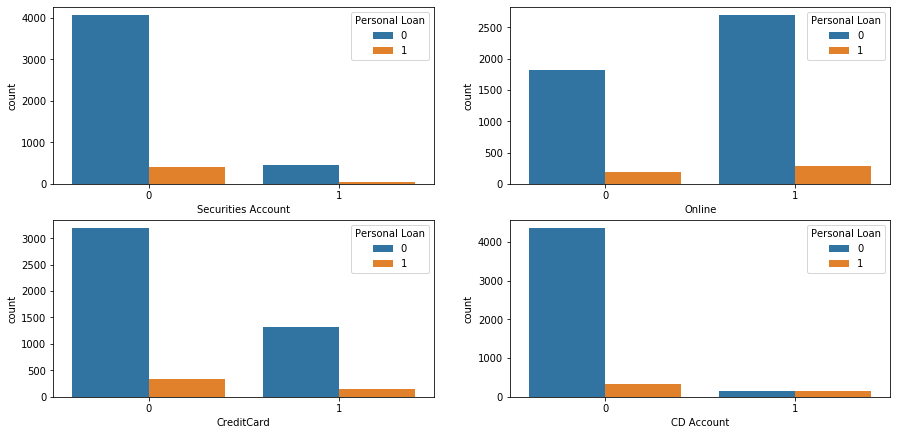

In [39]:
#Distribution of Target column (Personal Loan) with respect to all other Independent Categorical attributes

plt.figure(figsize=(15,15))

plt.subplot(4,2,1)
sns.countplot(x="Securities Account", data=loan_bank ,hue="Personal Loan")

plt.subplot(4,2,2)
sns.countplot(x="Online", data=loan_bank ,hue="Personal Loan")

plt.subplot(4,2,3)
sns.countplot(x="CreditCard", data=loan_bank ,hue="Personal Loan")

plt.subplot(4,2,4)
sns.countplot(x='CD Account' ,data=loan_bank ,hue='Personal Loan')

Text(0.5, 1.0, 'Customers Disribution with respect to not take Personal loan ')

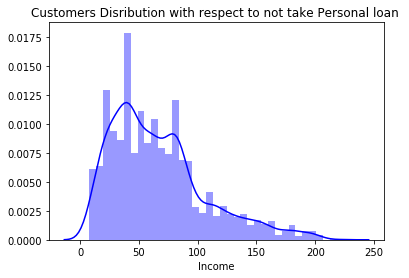

In [216]:
#Customers_Income data Disribution with respect to not taken Personal loan
sns.distplot(loan_bank[loan_bank['Personal Loan'] == 0]['Income'], color = 'blue');
plt.title('Customers Disribution with respect to not take Personal loan ')

Text(0.5, 1.0, 'Customers Disribution with respect to taken Personal loan ')

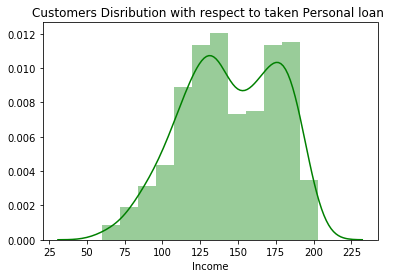

In [41]:
#Customers_Income Data Disribution with respect to taken Personal loan
sns.distplot(loan_bank[loan_bank['Personal Loan'] == 1]['Income'], color = 'green');
plt.title('Customers Disribution with respect to taken Personal loan ')

In [42]:
#Evaluate Correlation of Target column with respect to Independent Numeric Attributes
loan_bank[['Personal Loan', 'Age','Experience', 'Income', 'CCAvg', 'Mortgage']].corr()

,Personal Loan,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,1.000000,-0.007726,-0.014013,0.502462,0.366889,0.142095
Age,-0.007726,1.000000,0.977182,-0.055269,-0.052012,-0.012539
Experience,-0.014013,0.977182,1.000000,-0.049046,-0.048718,-0.013365
Income,0.502462,-0.055269,-0.049046,1.000000,0.645984,0.206806
CCAvg,0.366889,-0.052012,-0.048718,0.645984,1.000000,0.109905
Mortgage,0.142095,-0.012539,-0.013365,0.206806,0.109905,1.000000


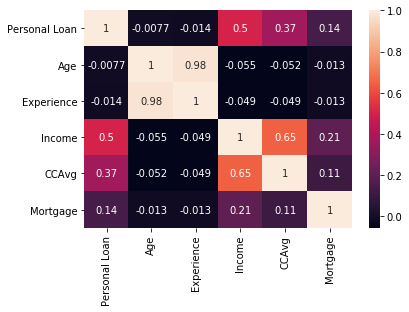

In [43]:
#Generate Heat Map using correlated values
corr= loan_bank[['Personal Loan', 'Age','Experience', 'Income', 'CCAvg', 'Mortgage']].corr()
sns.heatmap(corr,annot = True);

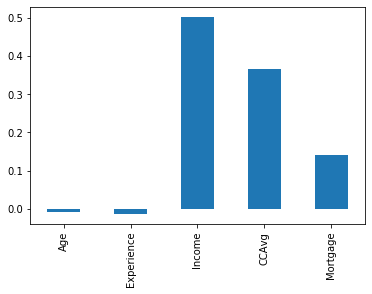

In [195]:
loan_bank[['Personal Loan', 'Age','Experience', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal Loan'][1:].plot.bar()

Customers who buy personal loan have a higher credit card average.

the members of family increases (say >=3) the necessity of loan is also increasing.

the income increases (approx 100K) the mortgage value also increases gradually wiht the necessity of personal loan.
'Age' has a very strong association with 'Experience' but nothing gets affected with loan attribute.
It seems that customers with education level is 1 is having more income which is mere equal to the customers who has taken the personal loan.
Customers with education level 2 & 3 seems to take personal loan as they have high mortgage.
Majority of customers who does not have loan is holding securities account, Whereas small proportion of customers having loan does hold but majority of them do not have securities account.
Customers who does not have CD account, does not have loan as well, but almost all customers who has CD account has loan as well.
The graph show those who have personal loan also have a higher income.
The above correlation Map shows a clear vision on the correlation between the independant variable and dependant variables, we see that 'Income' and 'Credit Card Average' has some correlation with 'Personal Loan'.

# 4)Split the data into training and test set in the ratio of 70:30 respectively

Using 70% of data for training and 30% for testing.

In [217]:
from sklearn.model_selection import train_test_split

# Setting Independent features
X = loan_bank.drop('Personal Loan',axis=1) 
#Set Target class label
y = loan_bank['Personal Loan']# Predicted class (1=Avail Personal loan, 0=not avail Personal Loan)

#Splitting the Original data into Train and test data set of 70:30
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


x_train.head()



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22.0,35,94304,2,1.3,1,0,0,0,1,0
4768,4769,38,14.0,39,93118,1,2.0,2,0,0,0,1,0
65,66,59,35.0,131,91360,1,3.8,1,0,0,0,1,1
177,178,29,3.0,65,94132,4,1.8,2,244,0,0,0,0
4489,4490,39,13.0,21,95518,3,0.2,2,0,0,0,1,0


In [46]:
#Display Target column's train data
pd.crosstab(y_train,columns='count',colnames=['Train data'])

Train data,count
Personal Loan,
0,3169
1,331


In [47]:
# Shape and size of Training dataset
print("Training data size\n",x_train.shape,y_train.shape)

Training data size
 (3500, 13) (3500,)


In [48]:
#Display the Independent features test dataset
x_test.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2764,2765,31,5.0,84,91320,1,2.9,3,105,0,0,0,1
4767,4768,35,9.0,45,90639,3,0.9,1,101,1,0,0,0
3814,3815,34,9.0,35,94304,3,1.3,1,0,0,0,0,0
3499,3500,49,23.0,114,94550,1,0.3,1,286,0,0,1,0
2735,2736,36,12.0,70,92131,3,2.6,2,165,0,0,1,0


In [49]:
#Display Target column's Test data
pd.crosstab(y_test,columns='count',colnames=['Test data'])

Test data,count
Personal Loan,
0,1351
1,149


In [209]:
#Print Test data size

print("\nTesting data size\n",x_test.shape,y_test.shape)


Testing data size
 (1500, 13) (1500,)


In [50]:
#check split of dataset
print("{0:0.2f}% data is in training set".format((len(x_train)/len(loan_bank.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(loan_bank.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [196]:
#Detailed Summary count of Original, Train and Test DataSet
print("Customer Personal Loan avail count     : {0} ({1:0.2f}%)".format(len(loan_bank.loc[loan_bank['Personal Loan'] == 1]), (len(loan_bank.loc[loan_bank['Personal Loan'] == 1])/len(loan_bank.index)) * 100))
print("Customer Personal Loan not avail count   : {0} ({1:0.2f}%)".format(len(loan_bank.loc[loan_bank['Personal Loan'] == 0]), (len(loan_bank.loc[loan_bank['Personal Loan'] == 0])/len(loan_bank.index)) * 100))
print("")
print("Training data- Personal Loan avail count    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training data -Personal Loan not avail count   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Testing data- Personal Loan avail count: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Testing data- Personal Loan not avail count      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Customer Personal Loan avail count     : 480 (9.60%)
Customer Personal Loan not avail count   : 4520 (90.40%)

Training data- Personal Loan avail count    : 331 (9.46%)
Training data -Personal Loan not avail count   : 3169 (90.54%)

Testing data- Personal Loan avail count: 149 (9.93%)
Testing data- Personal Loan not avail count      : 1351 (90.07%)



# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans & 6. Print the confusion matrix for all the above models

# Building Logisitic Regression Model

In [199]:
#Logistic Regression model build

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict target class on test data
y_predict = model.predict(x_test)
predictProb = model.predict_proba(x_test)
#Evaluate Coeffecient and Intercept 
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)
print(" \n Predicted count observed from Logistic Regression Model")
out= pd.crosstab(y_predict,columns=['Predicted count'],colnames = ['Personal Loan']).reset_index()
out.drop('row_0',axis=1)


          0         1         2         3         4         5         6  \
0 -0.000037 -0.000218 -0.003501  0.036085 -0.000064  0.008423  0.005685   

          7         8         9        10       11       12  intercept  
0  0.009159  0.000858  0.000297  0.002641 -0.00009 -0.00003  -0.000058  
 
 Predicted count observed from Logistic Regression Model


Personal Loan,Predicted count
0,1425
1,75


In [202]:
pd.crosstab(y_test,columns='Actual count')

col_0,Actual count
Personal Loan,
0,1351
1,149


# Accuracy score of Logisitic Regression Model 

In [201]:
model_score_test = model.score(x_test, y_test)
print(" Accuary of Logistic Regression in Test Data set",model_score_test)
model_score_train = model.score(x_train,y_train)
print("\n Accuracy of Logisitc Regression in Train Data set ",model_score_train)
acc = accuracy_score(y_test, y_predict)
print( '\n Accuracy score of Logisitic Regression Model',acc)

 Accuary of Logistic Regression in Test Data set 0.908

 Accuracy of Logisitc Regression in Train Data set  0.9077142857142857

 Accuracy score of Logisitic Regression Model 0.908


# Print Confusion Matrix of Logistic Regression Model

In [55]:
# Define Function to print Confusion Matrix of Logistic Regression Model
def print_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Buy Personal Loan", " Not buy Personal Loan"] , yticklabels = ["Buy Personal Loan", "Not buy Personal Loan"] )
    plt.title('Confusion Matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

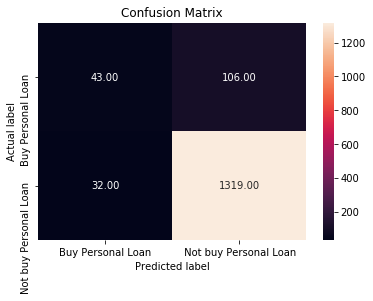

In [203]:
#Confusion Matrix print function declaration
print_cm(y_test, y_predict )

# Classification Report of Logisitic Regression Model 

In [204]:
print("\n Classification Report of Logisitic Regression Model \n",classification_report(y_test, y_predict))


 Classification Report of Logisitic Regression Model 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

    accuracy                           0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500



# Building K-NN Model

In [207]:
# Creating odd list of K for KNN
mydata = list(range(1,20))

# Subsetting just the odd 
neighbors = list(filter(lambda x: x % 2 != 0, mydata))

# Choosing the optimal K-Value

In [206]:
# Empty list that will retain accuracy scores
accuracy_scores = []

# Evaluate accuracy metrics for odd values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Predict the Target label
    y_predict = knn.predict(x_test)
    
    # Determine accuracy metrics
    scores = accuracy_score(y_test, y_predict)
    accuracy_scores.append(scores)

# Converting to misclassification error
MCE = [1 - x for x in accuracy_scores]

# Determining the optimal value of K
optimal_k = neighbors[MCE.index(min(MCE))]
print("Optimal number of neighbors is %d" % optimal_k)

Optimal number of neighbors is 5


Text(0, 0.5, 'Misclassification Error')

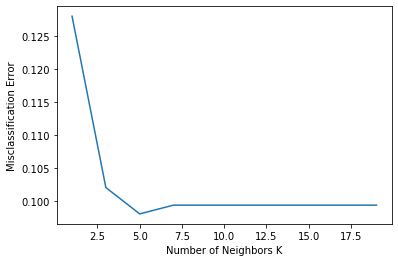

In [208]:
# Plotted Distribution to find the optimal value of K
plt.plot(neighbors, MCE);
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

# Accuracy score of K-NN Classification Model 

In [131]:
#Build KNN Model
knn = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform', metric = 'euclidean')
knn.fit(x_train, y_train)    
knn_score_test = knn.score(x_test, y_test)
print(" Accuary of K-NN classification Model in Test Data set",knn_score_test)
knn_score_train = knn.score(x_train,y_train)
print("\n Accuracy of k-NN classification Model in Train Data set ",knn_score_train)
predicted_value = knn.predict(x_test)
accuracy = accuracy_score(y_test,predicted_value)
print( '\n Accuracy score of K-NN Classification Model',accuracy)

 Accuary of K-NN classification Model in Test Data set 0.902

 Accuracy of k-NN classification Model in Train Data set  0.9117142857142857

 Accuracy score of K-NN Classification Model 0.902


# Print Confusion Matrix of K-NN Classification Model

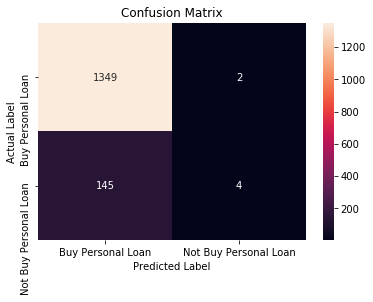

In [132]:
cm1 = metrics.confusion_matrix(y_test, predicted_value)

label = ["Buy Personal Loan", "Not Buy Personal Loan"]
knn_cm = pd.DataFrame(cm1, index = label, columns = label)
sns.heatmap(knn_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Classification Report of KNN Model 

In [111]:
print("\n Classification Report of KNN Model \n ",classification_report(y_test, predicted_value))


 Classification Report of KNN Model 
                precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.67      0.03      0.05       149

    accuracy                           0.90      1500
   macro avg       0.78      0.51      0.50      1500
weighted avg       0.88      0.90      0.86      1500



# Building Naïve Bayes Model

In [133]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [212]:
# Build Naive Bayes Model
gnb = GaussianNB()
gnb.fit(x_train ,y_train)
predict_out = gnb.predict(x_test) 

# Accuracy score of Naïve Bayes Model

In [213]:
gnb_score_test = gnb.score(x_test, y_test)
print(" Accuary of Gaussian Naive Bayes classification Model in Test Data set",gnb_score_test)
gnb_score_train = gnb.score(x_train,y_train)
print("\n Accuracy of Gaussian Naive Bayes classification Model in Train Data set ",gnb_score_train)
acc_out = accuracy_score(y_test,predict_out)
print( '\n Accuracy score of K-NN Classification Model',acc_out)

 Accuary of Gaussian Naive Bayes classification Model in Test Data set 0.8826666666666667

 Accuracy of Gaussian Naive Bayes classification Model in Train Data set  0.8942857142857142

 Accuracy score of K-NN Classification Model 0.8826666666666667


# Print the Confusion Matrix of Naïve Bayes Model

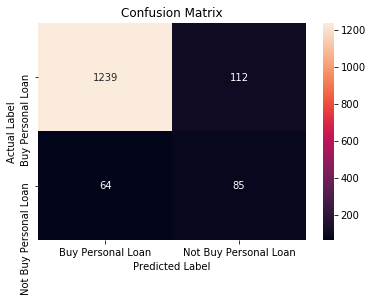

In [144]:
cm2 = metrics.confusion_matrix(y_test,predict_out)
label_in = ["Buy Personal Loan", "Not Buy Personal Loan"]
gnb_cm = pd.DataFrame(cm2, index = label_in, columns = label_in)
sns.heatmap(gnb_cm, annot = True ,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Classification Report of Gaussian Naive Bayes Model 

In [214]:
print("\n Classification Report of Gaussian Naive Bayes Model \n ",classification_report(y_test, predict_out))


 Classification Report of Gaussian Naive Bayes Model 
                precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.43      0.57      0.49       149

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



# 7. Give your reasoning on which is the best model in this case and why it performs better?

# Model comparison of Logistic, K-NN and Naïve Bayes Model

KNN: 0.897400 (0.012043)
LR: 0.908800 (0.007652)
NB: 0.887400 (0.004673)


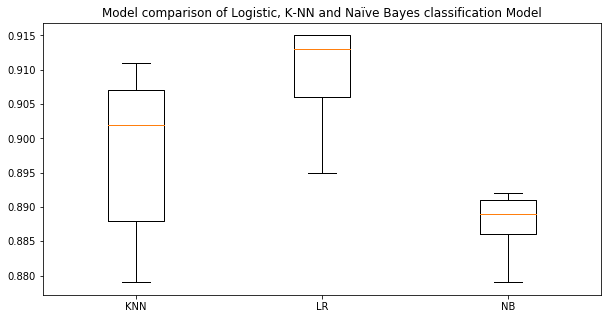

In [218]:
best_model = []
best_model.append(('KNN', KNeighborsClassifier()))
best_model.append(('LR', LogisticRegression(solver='liblinear')))
best_model.append(('NB', GaussianNB()))
X

# Evaluate each model 
output = []
identifier = []
Best_scoring = 'accuracy'
for name, model in best_model:
# Perform k-fold Cross-Validation to evaluate the Performance metrics of Logistic, K-NN and Naïve Bayes Model
    kfold = model_selection.KFold(n_splits=5)
    cv_output = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=Best_scoring)
    output.append(cv_output)
    identifier.append(name)
    result = "%s: %f (%f)" % (name, cv_output.mean(), cv_output.std())
    print(result)
    
# Using Box plot to find the Best Model 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.title("Model comparison of Logistic, K-NN and Naïve Bayes classification Model")
plt.boxplot(output);
ax.set_xticklabels(identifier)
plt.show()

Conclusion:
Thera Bank's motive is to convert their liability customers into Personal loan customers.
To set a new marketing campaign , they need to capture possible information about the behaviour of customers.
Logistic, K-NN and Naïve Bayes Classification Model used to find the Best accuracy Rate for target customer prediction
Hence from the model comparison plot,'Logistic Regression' Model have the highest accuracy score.
Logistic Regression is the Best model for predicting Potential customers who buy Personal Loan
